## Import tensorflow

In [7]:
import matplotlib.pyplot as plt

import tensorflow as tf
layers = tf.keras.layers

import numpy as np

print(tf.__version__)

2.0.0-beta0


## Download and preprocess the data

In [8]:
mnist = tf.keras.datasets.fashion_mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [9]:
x_train, x_test = x_train / 255.0, x_test / 255.0

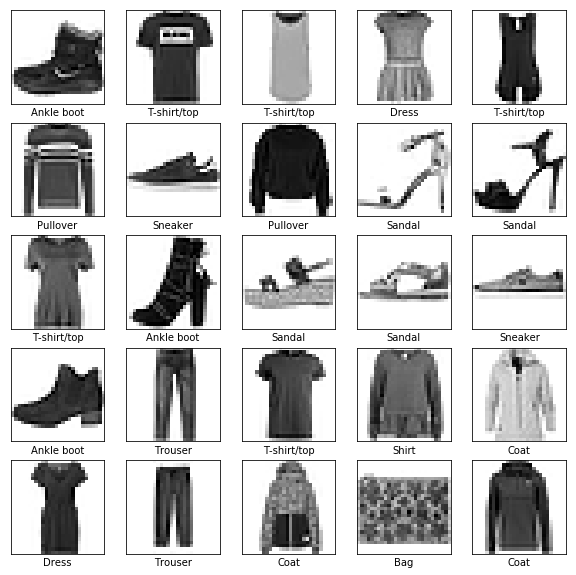

In [10]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[y_train[i]])
plt.show()

## Build the model

In [11]:
model = tf.keras.Sequential()

In [12]:
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))
# Such a model can then be compiled and trained in a few lines:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.fit(x_train, y_train, epochs=5)

W0613 22:31:21.394272 4395816384 deprecation.py:323] From /Users/inferno/anaconda/lib/python3.6/site-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 60000 samples
Epoch 1/5
60000/60000 [==============================] - 3s 43us/sample - loss: 0.5157 - accuracy: 0.8182
Epoch 2/5
60000/60000 [==============================] - 2s 40us/sample - loss: 0.3796 - accuracy: 0.8624
Epoch 3/5
60000/60000 [==============================] - 3s 45us/sample - loss: 0.3429 - accuracy: 0.8733
Epoch 4/5
60000/60000 [==============================] - 2s 41us/sample - loss: 0.3194 - accuracy: 0.8824
Epoch 5/5
60000/60000 [==============================] - 2s 39us/sample - loss: 0.3011 - accuracy: 0.8892


## Testing

In [13]:
model.evaluate(x_test, y_test)

10000/10000 [==============================] - 0s 26us/sample - loss: 0.3623 - accuracy: 0.8697


[0.36234624367952345, 0.8697]

In [14]:
predictions = model.predict(x_test)

In [15]:
def plot_image(i, predictions_array, true_label, img):
    predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
  
    plt.imshow(img, cmap=plt.cm.binary)

    predicted_label = np.argmax(predictions_array)
    
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'
  
    plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                        100*np.max(predictions_array),
                                        class_names[true_label]),
                                        color=color)

def plot_value_array(i, predictions_array, true_label):
    predictions_array, true_label = predictions_array[i], true_label[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color="#777777")
    plt.ylim([0, 1]) 
    predicted_label = np.argmax(predictions_array)
    
    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')

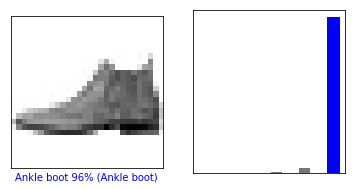

In [16]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, y_test, x_test)
plt.subplot(1,2,2)
plot_value_array(i, predictions,  y_test)
plt.show()

In [18]:
predicted_label = class_names[np.argmax(predictions[0])]
print('Actual label:', class_names[y_test[0]]) 
print('Predicted label:', predicted_label)

Actual label: Ankle boot
Predicted label: Ankle boot
